<a href="https://colab.research.google.com/github/TomaszDudzik/P_002_ML---Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction


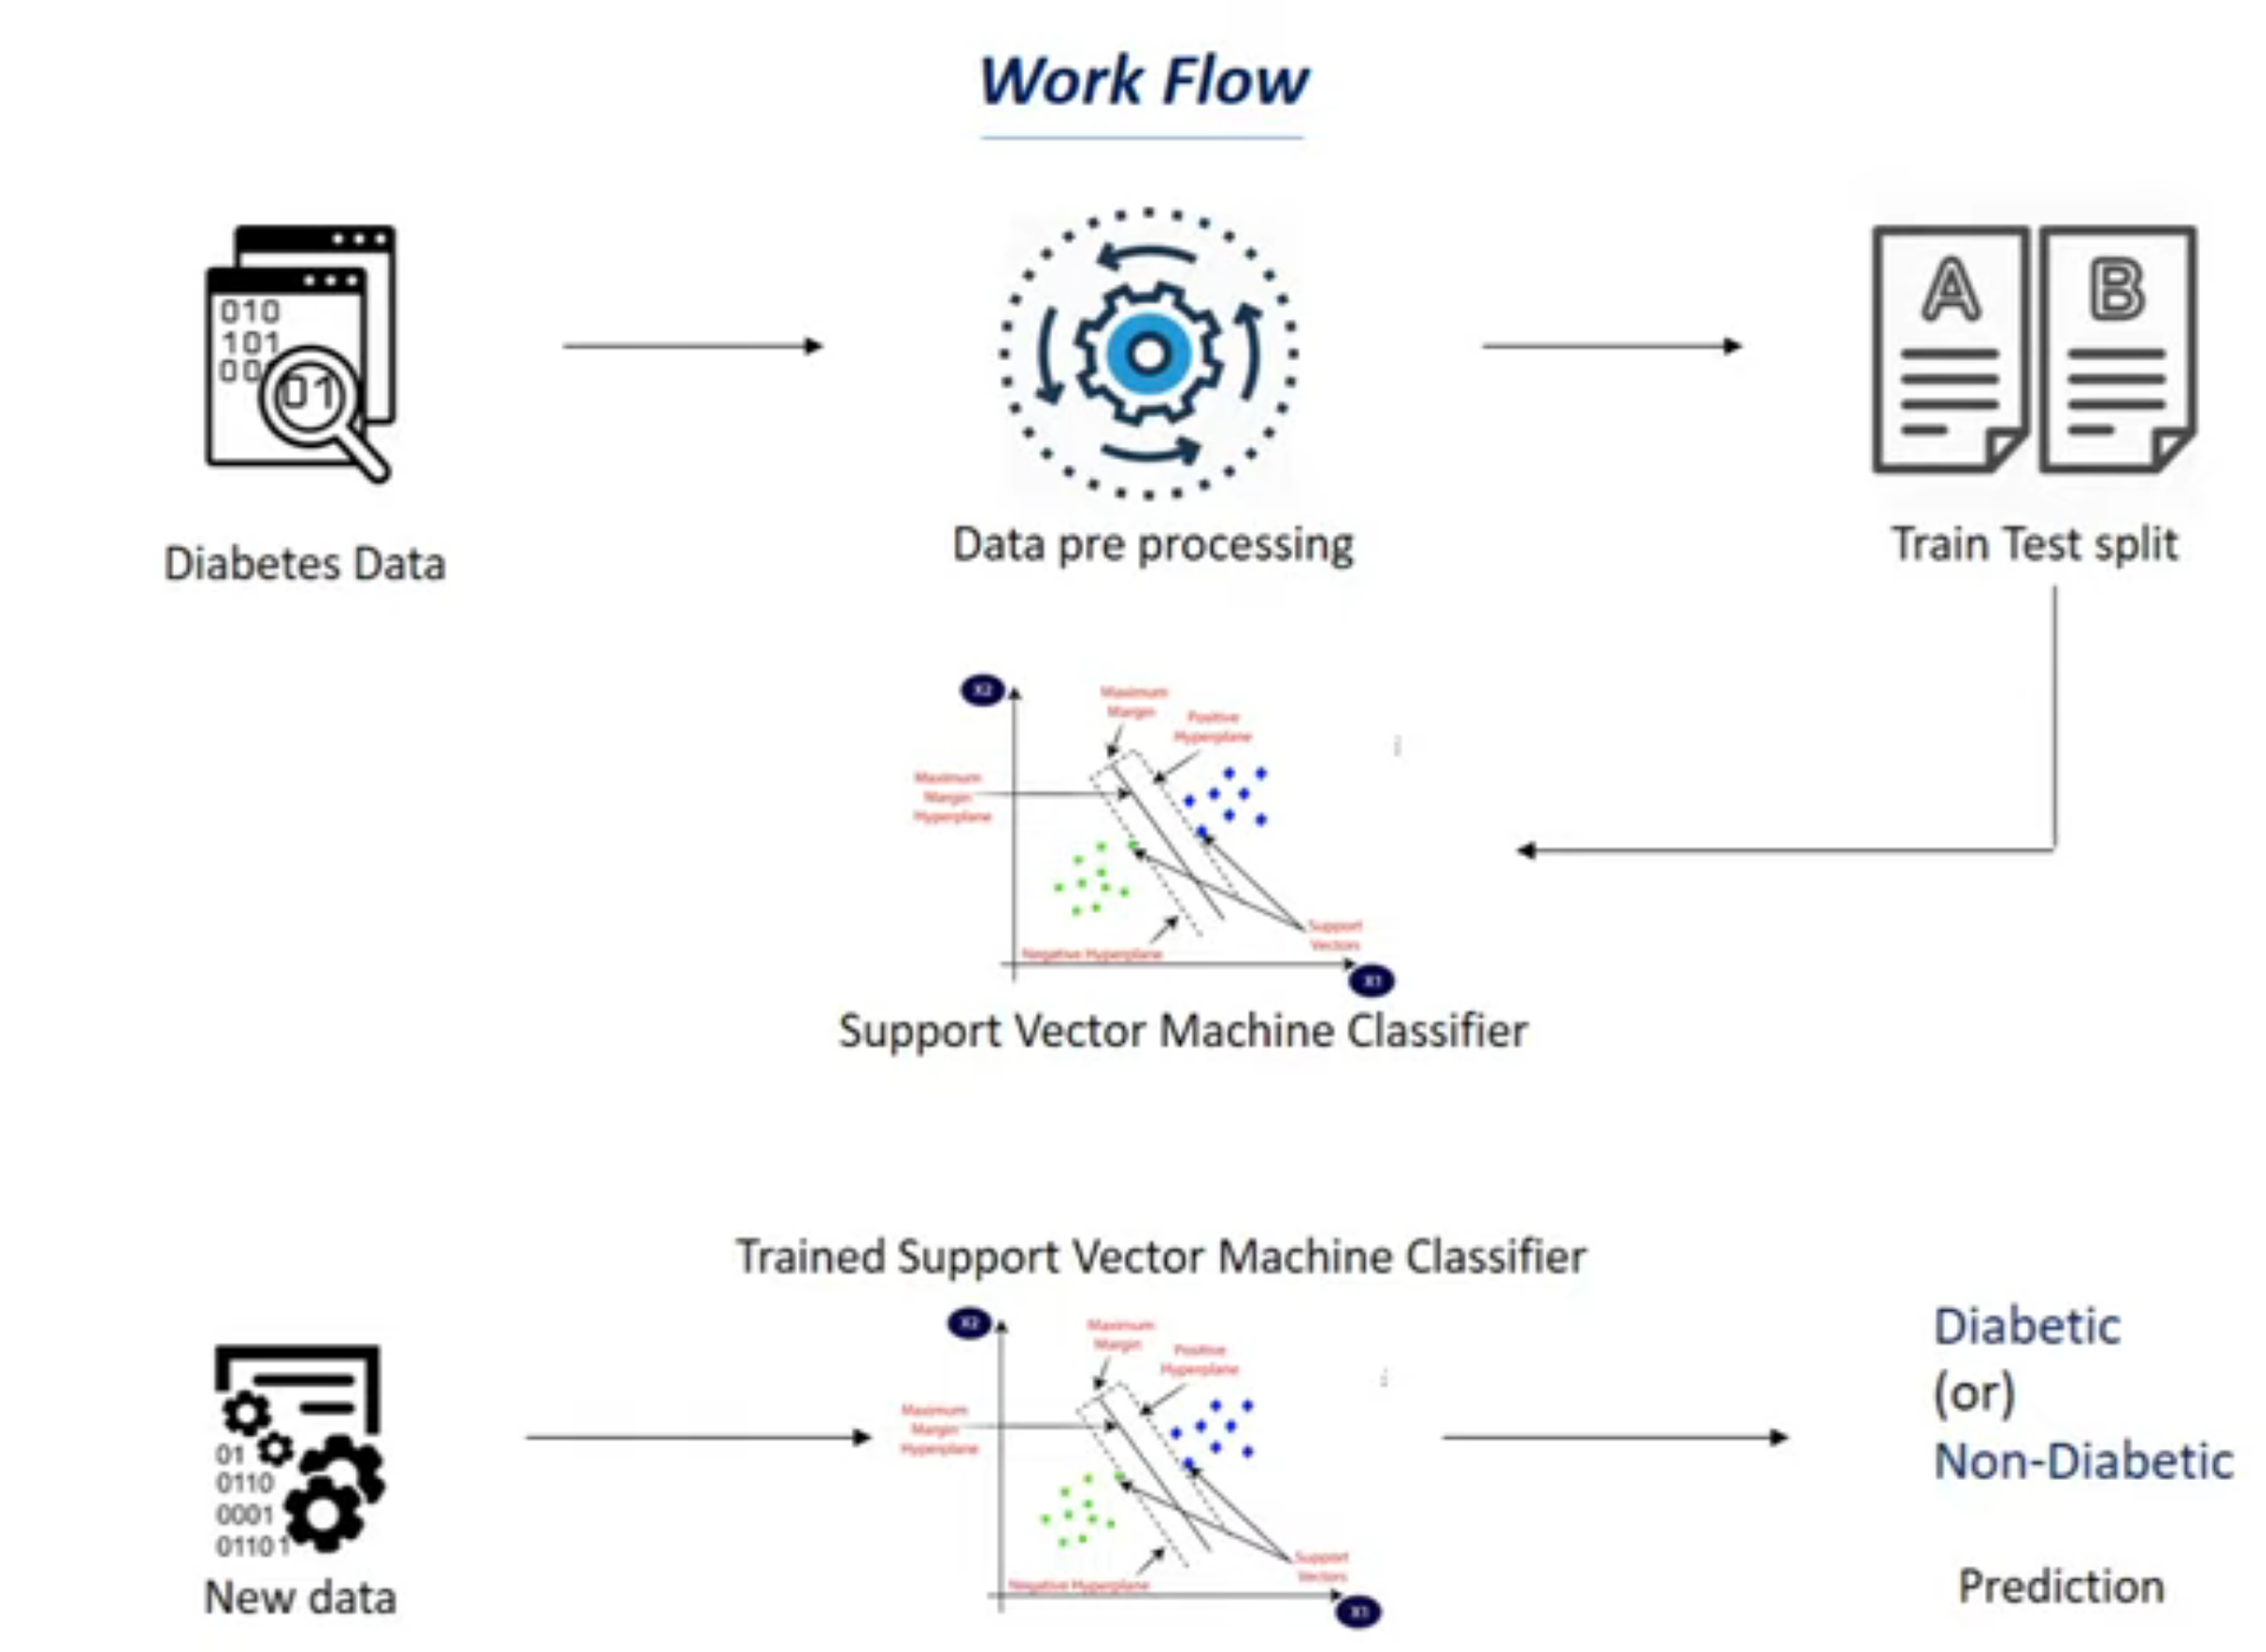

## Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## Data preparation

In [ ]:
# load data
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
# show first 5 elements
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# show type per atribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# show number of rows and columns
df.shape

(768, 9)

In [ ]:
# show stats
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# show how many people 
# 0 --> non-diabetic 
# 1 --> diabetic
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# to see what is causing the diabetic
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# seperating data and labels
X = df.drop(columns = 'Outcome', axis = 1)
y = df['Outcome']

## Standardize data

In [ ]:
# to ensure that all features are treated the same way, without bias

scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
df_standardized = scaler.transform(X)

In [ ]:
X = df_standardized

In [ ]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Model

In [ ]:
# Split data for Training and Test
# X --> features 
# y --> outcome
# test_size --> % of data go to test 
# stratify --> only use for classification problem. Split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset. 
# random_state --> this is done to ensure that datasets are a representative sample (e.g. random sample) of the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [ ]:
X.shape[0], X_train.shape[0], X_test.shape[0]

(768, 614, 154)

In [ ]:
# Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
classifier = svm.SVC(kernel='linear')

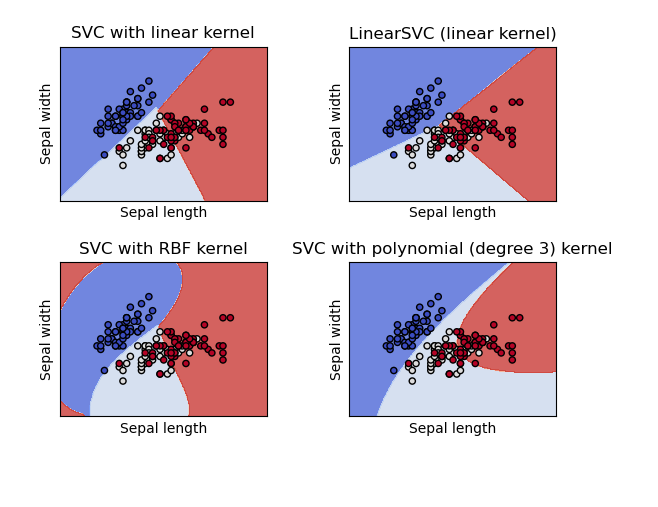

In [ ]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Model Evaluation

In [ ]:
# accuracy score for training data
X_train_pred = classifier.predict(X_train)
train_data_acc = accuracy_score(X_train_pred, y_train)
print('Accuracy score for train data: ', train_data_acc)

Accuracy score for train data:  0.7833876221498371


In [ ]:
# accuracy score for test data
X_test_pred = classifier.predict(X_test)
test_data_acc = accuracy_score(X_test_pred, y_test)
print('Accuracy score for test data: ', test_data_acc)

Accuracy score for test data:  0.7792207792207793


## Check the model

In [ ]:
input_data = (8,183,64,0,0,23.3,0.672,32)
# change to dataframe and transpose 
input_data_df = pd.DataFrame(input_data).T
# need to scale it
std_data = scaler.transform(input_data_df)
# prediction
prediction = classifier.predict(std_data)
if (prediction[0] == 0):
    print('Non-Diabetic')
else:
    print('Diabetic')


Diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
